In [5]:
import requests
import json
from contextlib import closing
# make base URL and dictionary of get request key/values
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'Brexit', 'show-blocks':'body', 
           'page-size': 200, 'show-tags': 'contributor'} # key/values for get request (look up in api, there are lots)

# Perform the actual request
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
#     print(articles)
summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results'] if x['tags']]
# print(summaries)
# summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results']]
# print(len(summaries))
# # print(len([word for document in summaries for word in summaries[0].split()]))
words = [word for document in summaries for word in document.split()]
print(summaries)
print(len(summaries))

['European Union exit and trade (European affairs) sub-committee PM I went to Brussels. Met the EU leaders. They wanted to know our plan. I had nothing to tell them. Foreign secretary Rome wasn’t built in a day. PM We need a plan. The EU wants to know the plan. Parliament wants to know the plan. It has been four frigging months! No plan! I’m beginning to wonder if this will be over in my lifetime. Foreign secretary Probably not. How old are you, actually? PM You three ran the leave campaign. I assumed you had some idea what to do. Foreign secretary Nope. Trade minister The Great Repeal bill will solve the problem. PM No. EU-related law constitutes more than one-sixth of our statutes. I’m told there are 12,295 EU regulations concerning consumer and banking rules and food-safety standards. The bill will simply transfer all those EU rules into UK law. Then we still have to\xa0get rid of them, one by one. Brexit minister Independence! Sovereignty! Freedom! Chancellor Recession! Foreign sec

## Dataset Overview

We are using articles from theguardian.com, a British news and media website.  Specifically, we are extracting the body of articles from the paper's API. These results will contain articles from their newspapers, "The Guardian" and "The Observer", as well as their additional online content. Thus, our data is a collection of words from our query results.

We are querying theguardian.com because we are interested in web content and how certain text can affect views. Views mean ad revenue for these content  This is important as online content continues to grow, content creators need any advantage they can get. 

One thing we want to analyze is the frequency of certain words and where they fit on a grade level. We want to see if our dataset contains more words for higher or lower literacy readers. According to the Nielson Group, 30% of web users have lower literacy, which is reading around an 8th grade level. Based on word frequencies, we can see if changing word frequencies could allow for a different range of audience.

Another item we want to analyze is frequency of words and relate them to certain tags. For example, The Guardian API has a tag for "star-rating" which would allow us to see what words appear in popular and unpopular items.  This could help us determine if based on certain words if an article will be popular. We can also find relationships between word frequency and article contributors, production-office, and section. We could determine based on word frequencies if an article will contain a certain tag.


[10 points] Read in your document data as strings.
Rupal

[15 points] Verify data quality: remove words from the vocabulary that are not relevant or that you think should not be included. Alternatively, choose a specific vocabulary to choose for your data. 
Omar

http://www.ranks.nl/stopwords - possible stop words?

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

with open("combined_stop_words.txt") as textfile:
    stopwords = textfile.readlines()
    
print(stopwords)

stopwords = [word.strip() for word in content] 
print(stopwords)

In [6]:
# combined stop words from scikit-Learn's original source and 2 others, for 617 stop words
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py
# https://sites.google.com/site/kevinbouge/stopwords-lists
# http://algs4.cs.princeton.edu/35applications/stopwords.txt
with open("combined_stop_words.txt") as textfile:
    stopwords = textfile.readlines()
stopwords = [word.strip() for word in stopwords] 

[10 points] Convert the data from raw text into a sparse encoded bag-of-words representation.   
Rupal

[10 points] Convert the data into a sparse encoded tf-idf representation.
Omar

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer(stop_words=stopwords)

# tfidf_vect = TfidfVectorizer() 
tfidf_mat = tfidf_vect.fit_transform(summaries) 

# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df

,000,02,09,10,100,100m,101,104,105bn,106,...,zeichner,zilch,zimbabwe,zloty,zombie,zone,zones,zoo,zurich,óglaigh
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
6,0.000000,0.0,0.000000,0.014944,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
7,0.067617,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
8,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


In [8]:
# largest tfidf values
df.max().sort_values()[-10:]

ceo           0.565186
ambassador    0.577549
passport      0.583864
border        0.606420
horses        0.607600
beer          0.646638
startups      0.694797
nuclear       0.732417
christie      0.739200
hannan        0.864750
dtype: float64

In [9]:
# smallest tfidf values
df.max().sort_values()[:10]

foundered      0.007721
texted         0.007721
istúriz        0.007721
annoying       0.007721
ishmael        0.007721
embryonic      0.007721
palace         0.007721
testament      0.007721
iona           0.007721
pamphleteer    0.007721
dtype: float64

In [10]:
tfidf_vect.vocabulary_

{'restricting': 8411,
 'spine': 9315,
 'passports': 7116,
 'fission': 4056,
 'winthrop': 10923,
 'speaks': 9274,
 'counterproductive': 2434,
 'respect': 8381,
 'jump': 5573,
 'ja': 5476,
 'harm': 4685,
 'sensitivities': 8868,
 'rabblerousing': 7908,
 'obtain': 6811,
 'expunge': 3819,
 'airliners': 566,
 'thinks': 9971,
 'globalization': 4433,
 'incoming': 5153,
 'wrote': 11037,
 'technique': 9878,
 'ruled': 8617,
 'restoring': 8407,
 'battlefield': 1086,
 'clippings': 1963,
 'vox': 10721,
 'nicky': 6693,
 'lynton': 6043,
 'bender': 1169,
 'february': 3957,
 'drawbacks': 3235,
 'bodied': 1299,
 'raising': 7941,
 'gritty': 4556,
 'enforcement': 3516,
 'regulation': 8164,
 'sickly': 9016,
 'directive': 3010,
 'profitably': 7684,
 'fail': 3869,
 'underestimate': 10375,
 'bains': 1009,
 'confusion': 2212,
 'jacques': 5483,
 'claimant': 1910,
 'approaches': 772,
 'retraining': 8440,
 'honda': 4882,
 'willingness': 10904,
 '18': 48,
 'fossil': 4195,
 'newspaper': 6682,
 'disconnect': 3039,
 '

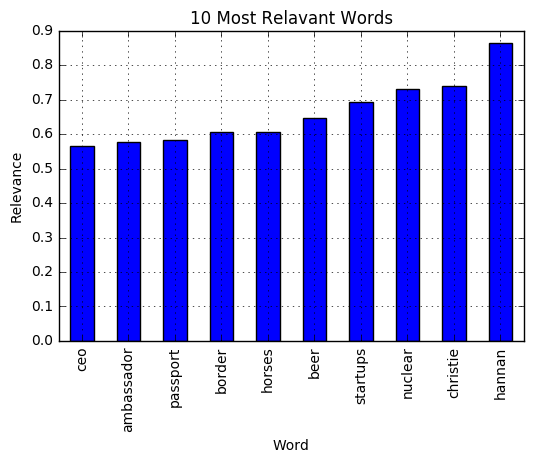

In [11]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
# could also say "%matplotlib notebook" here to make things interactive

df_top_10_tfidf = df.max().sort_values()[-10:]
axis = df_top_10_tfidf.plot(kind='bar', title="10 Most Relavant Words", grid=True)
axis.set_xlabel("Word")
axis.set_ylabel("Relevance")

The 10 most relevant words from our articles. The following is an analysis as to why they might be the most relevant.

**ceo:** Share prices in British companies are rising and as a result many British CEOs are enjoying additional wealth.

**ambassador:** Britain's ambassard to the EU quit in response to Brexit talks.
passport: British citizens with dual citizenships are seeking new passports to allow them to travel through the EU easily.

**border:** Concerns of border protection and border with Ireland.

**horses:** There is an agreement between the UK, France, and Ireland to allow horses to travel between the countries for races. Horses only need an EU passport and be on a database. Now there is doubt in the industry.

**beer:** Beer prices have risen as a result of Brexit.

**startups:** Many British startups are thinking of moving to the EU to keep a larger market.

**nuclear:** As a result of Brexit, Britain is having issues with Euratom, an agency formed with other European nations to regular nuclear energy. 

**christie:** Bridget Christie, British comedian whose material has shifted toward Brexit.

**hannan:** Reffering to Daniel Hannan, British politician who was invaluable for the Britain's movement to leave the EU.

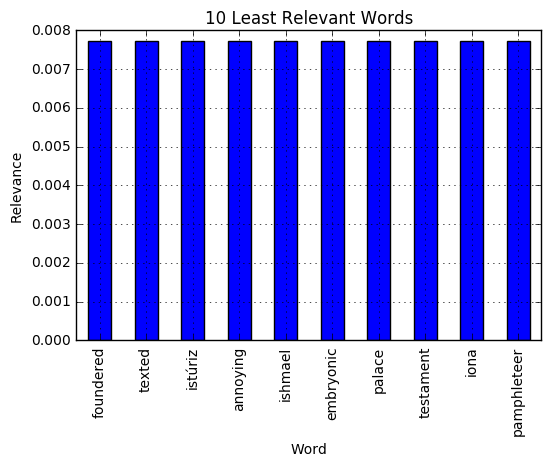

In [12]:
df_bottom_10_tfidf = df.max().sort_values()[:10]
axis = df_bottom_10_tfidf.plot(kind='bar', title="10 Least Relevant Words", grid=True)
axis.set_xlabel("Word")
axis.set_ylabel("Relevance")

The 10 least relevant words from our articles. The following is an analysis on some words not initially recognized.

**isturiz:** Spanish MEP from Spain's conservative party. We found a Guardian article where he describes lament over Britain's "imperial dreams".

**ishmael:** We found a Guardian article where Hannan quotes the bible.

**iona:** Iona is a Scottish island, a popular spot for tourists.

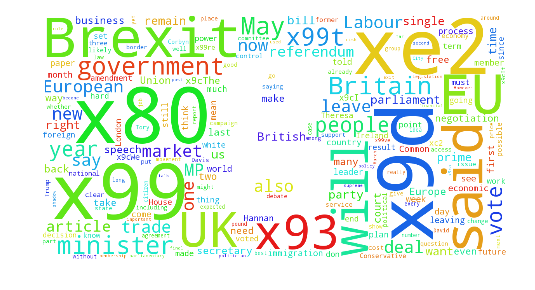

In [61]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

# text = open('summaries_as_textfile.txt', 'w')

# for summary in summaries:
#     text.write("%s\n" % summary.encode("utf-8"))


guardian_mask = np.array(Image.open("guardianlogo.png"))

text_for_wc = open("summaries_as_textfile.txt").read()

wc = WordCloud(background_color="white", mask=guardian_mask)
wc.generate(text_for_wc)

plt.imshow(wc)
plt.axis("off")
# plt.figure()

# plt.imshow(guardian_mask)
plt.axis("off")
plt.show()


([<matplotlib.patches.Wedge at 0x20db82dc9e8>,
  <matplotlib.text.Text at 0x20db8385470>])

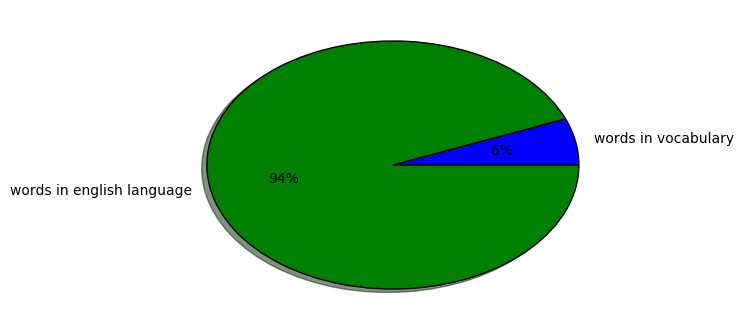

In [88]:
vocabulary_length = len(df.columns)

# information taken from https://en.oxforddictionaries.com/explore/how-many-words-are-there-in-the-english-language
num_words_in_english_language = 171476

labels = 'words in vocabulary', 'words in english language'
fracs = [vocabulary_length, num_words_in_english_language]

plt.pie(fracs, labels=labels, autopct='%.0f%%', shadow=True)

We thought it would be interesting to compare the number of words used in our documents vs the number of words in the english language.